# Using different models in Scikit-Learn

Models:
- SVM
- Desicion Tree
    - Binary Tree
    - Random Forest
    - Boosted Tree
- KNN
- Naive Bayes
- ...

https://scikit-learn.org/stable/ provides six classes of tasks, with a list of useful applications and algorithms in each class.

### How to use Sklearn

Again, remember these 5 steps:

1. Choose a class of model and import it from sklearn.
1. Choose model hyperparameters by instantiating this class with desired values.
1. Arrange data into a features matrix (x or x matrix) and target vector (y).
1. Fit the model to your data by calling **fit()**.
1. Apply the model to your "new" data using **predict()**.

**New Task: Classify "Phase" (solid, liquid, or gas) using "MeltingPoint" and "BoilingPoint" in the periodic table**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

In [3]:
Elements.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

Use descriptive statistics to understand the data

<AxesSubplot:>

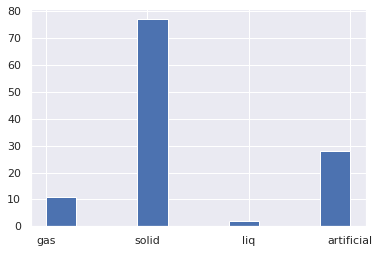

In [4]:
Elements['Phase'].hist()

Remove artificial elements

In [11]:
Elements_slg = Elements.loc[Elements['Phase'] != 'artificial']  # First, make sure that the data you will work with make senses from a materials science perspective.

Data visualization

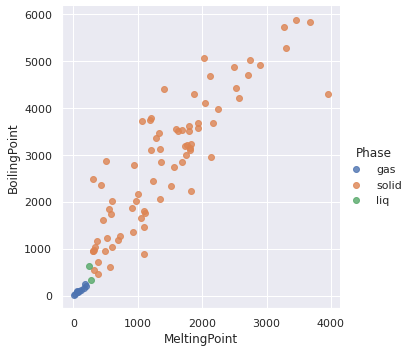

In [6]:
# sns.lmplot("MeltingPoint", "BoilingPoint", hue="Phase", data = Elements_slg, fit_reg = False); # Explicit x y seaborn updates 2022
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_slg, fit_reg = False);

Remove He (no MeltingPoint)

In [7]:
Elements_slg_new = Elements_slg.drop([1])

Try the first method under Classification in https://scikit-learn.org/stable/ 

In [8]:
from sklearn import svm
clf = svm.SVC()
#clf.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase']) data framename removal updates 2022
clf.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]].values, Elements_slg_new['Phase'])

SVC()

Try a "virtual" element with MeltingPoint = 1000 K and BoilingPoint = 2000 K

In [9]:
clf.predict([[1000, 2000]])

array(['solid'], dtype=object)

Plot predicted results with MeltingPoint and BoilingPoint ranging from 0 - 4000 K

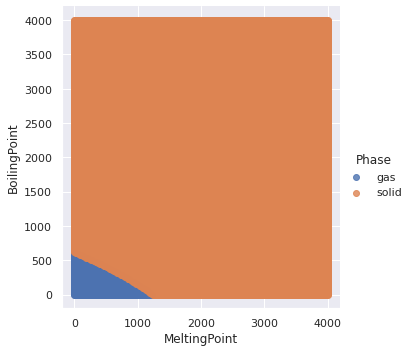

In [10]:
# array of melting point 
x_m = np.linspace(0, 4000, 401)
# array of boiling point
x_b = np.linspace(0, 4000, 401)
# Get 2D mesh of x_m and x_b
xx_1, xx_2 = np.meshgrid(x_m, x_b)
# flatten the 2D array to plot decision boundary
xx = np.concatenate((xx_1.ravel().reshape(-1,1), xx_2.ravel().reshape(-1,1)), axis=1)
# predict
y = clf.predict(xx)
# plot the result
Elements_predit = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
# sns.lmplot("MeltingPoint", "BoilingPoint", hue="Phase", data = Elements_predit, fit_reg = False); Explicit x y seaborn updates 2022
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predit, fit_reg = False);
# does the predicted result look satisfactory?

**Accuracy classification score**: 

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [16]:
# y_model = clf.predict(Elements_slg_new[["MeltingPoint", "BoilingPoint"]]) data framename removal updates 2022
y_model = clf.predict(Elements_slg_new[["MeltingPoint", "BoilingPoint"]].values)

# count how many elements are classified correctly and incorrectly
print("correct count:", np.sum(Elements_slg_new['Phase'] == y_model))  # How many 'True' do we have in these 89 elements.
print("inccorrect count:", np.sum(Elements_slg_new['Phase'] != y_model))  # How many 'False' do we have in these 89 elements.

from sklearn.metrics import accuracy_score  # Tells that the percentage of the data that we successfully assigned using our model.
accuracy_score(Elements_slg_new['Phase'], y_model)

correct count: 87
inccorrect count: 2


0.9775280898876404

### Using other methods to classify "Phase" (solid, liquid, or gas) using "MeltingPoint" and "BoilingPoint" in the periodic table

**Decision Tree** (handson)

**k-nearest neighbors (KNN) algorithm**

The k-nearest neighbors algorithm (KNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether KNN is used for classification or regression:

In KNN classification, the output is a category. An object is classified by a popularity vote of its neighbors, with the object being assigned to the category most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [12]:
from IPython.display import display, Image  # non=parametric means that the method doesn't have a functional form like y = f(x)
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png')
# what does the new data point (green point in the image) belong to? (the red category or the blue category?)
# In this image, the new data point could be grouped into the red. (If we choose 3 nearest neighbor algorithm)
# the result will change based on how many neighbors we choose

Example of KNN classification: a new sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

Ref: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [13]:
from sklearn import neighbors

# select hyperparameter
# for each new data point, you only count 1 nearest neighbor
n_neighbors = 1  # This is the hyperparameter in the model.

clf_knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'uniform')
# clf_knn.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase']) data framename removal updates 2022
clf_knn.fit(Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase'])

KNeighborsClassifier(n_neighbors=1)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


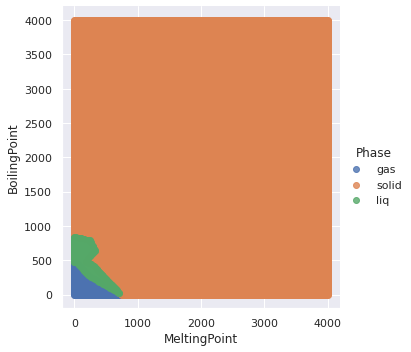

In [14]:
y = clf_knn.predict(xx)
# plot the result
Elements_predit = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
# sns.lmplot("MeltingPoint", "BoilingPoint", hue="Phase", data = Elements_predit, fit_reg = False); Explicit x y seaborn updates 2022
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predit, fit_reg = False);

In [19]:
# y_model_knn = clf_knn.predict(Elements_slg_new[["MeltingPoint", "BoilingPoint"]]) data framename removal updates 2022
y_model_knn = clf_knn.predict(Elements_slg_new[["MeltingPoint", "BoilingPoint"]])
accuracy_score(Elements_slg_new['Phase'], y_model_knn)
# This is an universal problem with neighbor = 1 -> always guaranteed a 100% accuracy
# By the principle of the knn method, for each data point, the nearest data must be itself. (That's why there is always a 100% accuracy.)
# neighbor = 1 is not useful for prediction purpose.

1.0

Always 100% accuracy. Why? Is this behavior desirable or not?

No only this is a problem in classification. The same problem also occurs in regression (overfitting):

In [20]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Overfitted_Data.png/300px-Overfitted_Data.png')

Noisy (roughly linear) data is fitted to a linear function and a polynomial function. Although the polynomial function is a perfect fit, the linear function can be expected to generalize better: if the two functions were used to extrapolate beyond the fitted data, the linear function should make better predictions.

Ref: https://en.wikipedia.org/wiki/Overfitting

# Model testing and selection

We want our model to successfully work for new data "unseen" by the model. However, we don't always have new data to work with...


### train-test splitting (holdout sets)

Simplest method. Based on the fact that training and testing cannot be performed using the same data.

We hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility in Scikit-Learn:


In [21]:
from sklearn.model_selection import train_test_split

# split the data with 80% in training set and 20% in testing set
# xx_train is 80% of the original x (89 elements) 
# train_size = 0.8 means 80% of the data being trained
xx_train, xx_test, y_train, y_test = train_test_split(Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase'], random_state = 290, train_size = 0.8)

n_neighbors = 1
clf_knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'uniform')

# fit the model on training set of data
clf_knn.fit(xx_train, y_train)

# evaluate the model on the testing set of data
y_model_knn = clf_knn.predict(xx_test)
# comparing the true behavior of the result (y_test of 20% of the testing data) to the predicted result
accuracy_score(y_test, y_model_knn)

0.9444444444444444

What is the problem with this naive train-test splitting method?

In [23]:
# What is the problem with this naive train-test splitting method?
# -> You are not using all the data points to train the model. (Also, the value will change because of the random_state number(no unique answer))
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/500px-K-fold_cross_validation_EN.svg.png')
# all data devided into n different groups, and use n-1 group in each iteration to train the model.

### Cross-validation

1. avoid wasting data
1. improve the randomness from choosing the holdout set

number of splits is n -> **n-fold cross-validation**

In [26]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

# start with n = 5. shuffle status depends on the nature of data.
kf = KFold(n_splits = 5, shuffle = True, random_state = 290) # devide 89 data points into 5 groups
# shuffle the elements along x-axis randomly before putting them into 5 groups
# whether you shuffle or not depend on what data you have

# get the accuracy scores of each clf_knn model trained using the 4/5 of data, tested using 1/5 of data
ac = cross_val_score(clf_knn, Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase'], cv = kf)
# cv=kf, cv is cross-validation given by kf
ac.mean()

0.9549019607843137

A general guideline of n in cross validation: n = 5 or n = 10.

In the extreme case, n = number of data points. This is called **leave-one-out cross validation**. Warning: LOOCV will be very slow!

In [28]:
kf = KFold(n_splits = 89, shuffle = True, random_state = 290)
ac = cross_val_score(clf_knn, Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase'], cv=kf)
ac.mean()

0.9550561797752809

##### Question: Does shuffling affect leave-one-out cross validation?

### The bias-variance trade-off

- The bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- The variance is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

Within KNN, which k gives the best bias-variance trade-off?

1 0.9549019607843137
2 0.9437908496732026
3 0.966013071895425
4 0.9549019607843137
5 0.9660130718954247
6 0.977124183006536
7 0.977124183006536
8 0.966013071895425
9 0.977124183006536
10 0.966013071895425
11 0.966013071895425
12 0.966013071895425
13 0.966013071895425
14 0.966013071895425
15 0.966013071895425
16 0.966013071895425
17 0.877124183006536
18 0.877124183006536
19 0.877124183006536
20 0.8660130718954248


(0.8, 1.0)

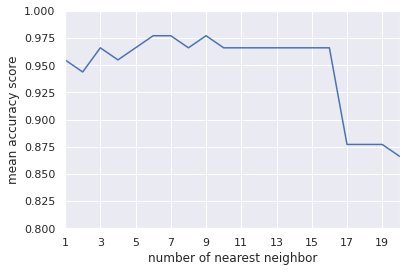

In [29]:
score = np.zeros(20)

for n_neighbors in range (1, 21):
    clf_knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'uniform')
    kf = KFold(n_splits = 5, shuffle = True, random_state = 290)
    ac = cross_val_score(clf_knn, Elements_slg_new[["MeltingPoint", "BoilingPoint"]], Elements_slg_new['Phase'], cv = kf)
    print(n_neighbors, ac.mean())
    score[n_neighbors - 1] = ac.mean() # ?
    
plt.plot(np.linspace(1, 20, 20), score)
plt.xlabel('number of nearest neighbor')
plt.ylabel('mean accuracy score')
plt.xlim(1, 20)
plt.xticks(np.arange(1, 20, 2))
plt.ylim(0.8, 1.0)

# you can also try validation_curve from sklearn.model_selection

**Bias-variance trade-off in regression**

Question: In the polynomial regression of the specific heating in HW 2. Does higher degree of the polynomial fitting induce more bias or more variance? If you use train-test splitting or cross validation, how does the true $ R^2 $ change with the degree of the polynomial fitting?

In [30]:
# plot R^2 vs. the polynomial fitting

# Other methods and their evaluation -- hands-on